In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [22]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [23]:
y = df_train['target']
X = df_train['text']
df_test = df_test['text']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer()

In [26]:
tfidf = TfidfVectorizer(stop_words='english')

In [27]:
X = tfidf.fit_transform(X)
df_test = tfidf.transform(df_test)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [29]:
model = LinearSVC()

In [30]:
param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'multi_class': ['ovr', 'crammer_singer']
}

In [31]:
fool_model = GridSearchCV(model, param_grid=param, cv=5, verbose=2, scoring='accuracy')

In [32]:
fool_model.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END ....C=0.01, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=0.01, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=hinge, multi_class

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.01, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, loss=hinge, multi_c

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr,

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=0.1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END .......C=1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.1s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.1s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.4s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.3s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END C=1, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.3s
[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.2s
[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s
[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.1s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: 

[CV] END ......C=10, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   7.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   8.7s
[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   3.9s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   5.7s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   5.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   6.9s
[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   5.9s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/pyth

[CV] END C=10, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   3.9s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=10, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   4.8s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   1.1s
[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   7.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   4.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   4.6s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   7.7s
[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   7.3s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/pyth

[CV] END C=10, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   3.3s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END .....C=100, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=  55.6s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=  58.5s
[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=   0.5s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=  58.1s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l1; total time=  58.5s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=  54.8s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=  53.0s
[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.4s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   8.9s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/pyth

[CV] END C=100, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=  56.3s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=100, loss=squared_hinge, multi_class=ovr, penalty=l2; total time=   0.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  54.8s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  53.2s
[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   0.5s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  54.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   8.6s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=  55.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=  53.2s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=   0.6s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=  54.4s
[CV] END C=100, loss=squared_hinge, multi_class=crammer_singer, penalty=l2; total time=  57.0s


/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklear

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [33]:
y_pred = fool_model.predict(df_test)
df_sub['target'] = y_pred

In [36]:
df_sub.to_csv('NLP_LinerSVC.csv', index=False, index_label=False)

In [35]:
fool_model.best_params_

{'C': 0.1, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}

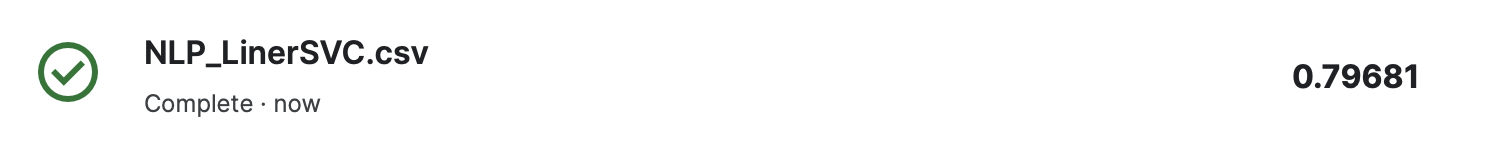